# MCscan (Python version) to identify syntenic blocks - binderized

(How is [this--> Multiple Collinearity Scan](http://chibba.agtec.uga.edu/duplication/mcscan/) related to https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version) ?)

Everything should be working. No installation necessary. See [here](https://github.com/fomightez/mcscan-binder) about how it works.

-----

This notebook works through [the example workflow][1].

Example Workflow
----------------

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

The [Example Workflow][1] at <https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)> begins with the command `!python2 -m jcvi.apps.fetch phytozome` but the files that fetches have already been put here. So continue with the next commands.  
(Technical reason:  Error when trying that command showed `ftp = FTP(o.netloc)` among the error traceback, and I know MyBinder doesn't allow FTP and so that explains why it won't work here.)

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [1]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Vvinifera_145_gene.gff3.gz -o grape.bed

01:48:15 [base] Load file `Vvinifera_145_gene.gff3.gz`
01:48:32 [gff] Extracted 26346 features (type=mRNA id=Name)


In [2]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ppersica_139_gene.gff3.gz -o peach.bed

01:48:33 [base] Load file `Ppersica_139_gene.gff3.gz`
01:48:48 [gff] Extracted 28701 features (type=mRNA id=Name)


Unclear if this is necessary, but doing first time since in process:

In [3]:
!python2 -m jcvi.formats.fasta format --sep="|" Vvinifera_145_cds.fa.gz grape.cds
!python2 -m jcvi.formats.fasta format --sep="|" Ppersica_139_cds.fa.gz peach.cds

In [4]:
!python2 -m jcvi.compara.catalog ortholog grape peach

01:48:58 [base] lastdb peach peach.cds
01:49:19 [base] lastal -u 0 -P 16 -i3G -f BlastTab peach grape.cds >grape.peach.last
01:52:34 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:52:34 [base] Load file `grape.bed`
01:52:34 [base] Load file `peach.bed`
01:52:35 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
01:52:35 [base] Load file `grape.peach.last`
01:52:39 [blastfilter] running the cscore filter (cscore>=0.70) ..
01:52:40 [blastfilter] after filter (294217->31226) ..
01:52:40 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
01:52:40 [blastfilter] after filter (31226->21087) ..
01:52:40 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:52:40 [base] Load file `grape.bed`
01:52:41 [base] Load file `peach.bed`
01:52:41 [base] Load file `grape.peach.last.filtered`
01:52:41 [synteny] A total of 21087 BLAST imported from `grape.peach.last.filtered`.
01:52:41 [synteny] Chaining distance = 20
01:52:42 [base] Load file `grape.peach.anchors

01:52:49 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:52:49 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:52:49 [__init__] backend agg version v2.2
01:52:50 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:52:50 [base] Load file `grape.bed`
01:52:51 [base] Load file `peach.bed`
01:52:51 [dotplot] Showing a random subset of 10000 data points (total 14695) for clarity.
01:52:52 [dotplot] xsize=26346 ysize=28701
01:52:52 [texmanager] serif font is not compatible with usetex.
01:52:52 [texmanager] serif font is not compatible with usetex.
01:52:52 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:52:52 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:52:52 [texmanager] cursive font is not compatible with usetex.
01:52:52 [texmanager] cursive font is not compatible with usetex.
01:52:52 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

01:52:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
01:52:53 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
01:52:53 [dviread] lh=18, bc=0, ec=170, nw=17, nh=16, nd=16
01:52:53 [dviread] find_tex_file(phvr7t.vf): ['kpsewhich', u'phvr7t.vf']
01:52:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
01:52:53 [dviread] Dvi: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
01:52:53 [dviread] find_tex_file(phvr8r.tfm): ['kpsewhich', u'phvr8r.tfm']
01:52:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
01:52:53 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
01:52:53 [dviread] lh=18, bc=1, ec=255, nw=30, nh=16, nd=16
01:52:53 [dviread] find_tex_file(phvr8r.vf): ['kpsewhich', u'phvr8r.vf']
01:52:53 [dviread] find_tex_file result: 
01:52:

01:52:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:52:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:52:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:52:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:52:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:52:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:52:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:52:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/bas

01:52:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:52:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:52:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:52:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:52:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:52:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:52:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:52:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:52:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:52:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:52:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:52:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:52:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:52:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:53:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:53:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:03 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:53:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:05 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:05 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:53:05 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:53:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:53:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:53:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:11 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:53:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:53:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:53:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:53:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:53:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:20 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:53:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:22 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:24 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:24 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:2

01:53:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:26 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:53:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:53:29 [dotplot] Dot plot title: Inter-genomic comparison: grape vs peach (14,695 gene pairs)
01:53:29 [texmanager] serif font is not compatible with usetex.
01:53:29 [texmanager] serif font is not compatible with usetex.
01:53:29 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:53:29 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:53:29 [texmanager] cursive font is

01:53:29 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
01:53:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:53:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:53:30 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:53:30 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [texmanager] ['latex', '-interaction=no

01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:53:30 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:30 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.tex']
01:53:30 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

01:53:31 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:31 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:32 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:32 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:32 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:33 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:33 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:34 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:34 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:35 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:35 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
01:53:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
01:53:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
01:53:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:37 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:53:37 [texmanager] serif font is not compatible with usetex.
01:53:37 [texmanager] serif font is not compatible with usetex.
01:53:37 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:53:37 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:53:37 [texmanager] cursive font is not compatible with usetex.
01:53:37 [texmanager] cursive font is not compatible with usetex.
01:53:37 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
01:53:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:38 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/d32cfd59675564fbf9da2f3df1490672.png', '/home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a

01:53:39 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0749d6b8d495ad47cac7ce54f7b5790b.dvi
01:53:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/06bdb3ea345986e066295fd3c1e7bfd1.dvi
01:53:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [texmanager] fontconfig: sans-serif

01:53:39 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b01af0bc9c57ce9190669c0353c8ff69.dvi
01:53:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/1f2aecc24e6ee9368d5e0ca1f64462b5.dvi
01:53:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:39 [texmanager] fontconfig: sans-serif

01:53:40 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
01:53:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
01:53:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:40 [texmanager] fontconfig: sans-serif

01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
01:53:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
01:53:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [texmanager] fontconfig: sans

01:53:41 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
01:53:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/730556baeecd7cb91ac8e4d5789d3977.dvi
01:53:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:41 [texmanager] fontconfig: sans-serif

01:53:42 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
01:53:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:42 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/02d14588d3c5ca012762154c768e20de.png', '/home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi']
01:53:42 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:42 [texmanager] fontconfi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.dvi
01:53:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:43 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/45d654a97014d3fe4c8b0ea0aead75e4.png', '/home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d

In [5]:
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

01:53:45 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:53:45 [base] Load file `grape.bed`
01:53:45 [base] Load file `peach.bed`
01:53:46 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,047 of 26,346 (15.4%)
Depth 1: 14,141 of 26,346 (53.7%)
Depth 2: 6,134 of 26,346 (23.3%)
Depth 3: 1,996 of 26,346 (7.6%)
Depth 4: 28 of 26,346 (0.1%)
Genome peach depths:
Depth 0: 3,347 of 28,701 (11.7%)
Depth 1: 16,459 of 28,701 (57.3%)
Depth 2: 7,065 of 28,701 (24.6%)
Depth 3: 1,830 of 28,701 (6.4%)
Depth 4: 0 of 28,701 (0.0%)
01:53:46 [__init__] $HOME=/home/jovyan
01:53:46 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
01:53:46 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
01:53:46 [__init__] matplotlib version 2.2.2
01:53:46 [__init__] interactive is False
01:53:46 [__init__] platform is linux2
01:53:46 [__init__] loaded modules: ['networkx.drawing.n

01:53:46 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:53:46 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:53:46 [__init__] backend agg version v2.2
grape vs peach syntenic depths
2:2 pattern
01:53:47 [texmanager] serif font is not compatible with usetex.
01:53:47 [texmanager] serif font is not compatible with usetex.
01:53:47 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:53:47 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:53:47 [texmanager] cursive font is not compatible with usetex.
01:53:47 [texmanager] cursive font is not compatible with usetex.
01:53:47 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
01:53:47 [texmanager] monospace font is not compatible with usetex.
01:53:47 [texmanager] monospace font is not compatible with usetex.
01:53:47 [texmanager] family: monospace, font: Computer Modern Typewriter,

01:53:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
01:53:48 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
01:53:48 [dviread] lh=18, bc=0, ec=127, nw=36, nh=16, nd=10
01:53:48 [dviread] find_tex_file(cmr10.vf): ['kpsewhich', u'cmr10.vf']
01:53:48 [dviread] find_tex_file result: 
01:53:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:48 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:53:48 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:48 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.tex']
01:53:48 [te

01:53:48 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:53:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:53:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:53:49 [backend_pdf] Assigning font /F2 = phvr8r (dvi)
01:53:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:53:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
01:53:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:49 [dviread] Dvi: /

01:53:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfafa4a62b58a70764190b68.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.dvi
01:53:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:51 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.tex']
01:53:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/sh

01:53:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/8020ab2c4cd42e10b9fcfe0c82330d73.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/d3ac9cc3dd59821301c664adee0d64e3.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:53:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/bf00829d8e9d1a37f161962e79ec9120.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:53 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
01:53:53 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:53 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/de99f1e18f6c7bdcb6ed645b43afc53b.png', '/home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/874ac87f674a773a3e75760c741f863a.dvi
01:53:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0ec938eb72cb9c7aab02173281100a1.dvi
01:53:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

01:53:54 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7a22f628b589779d70041019be99aa16.dvi
01:53:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:54 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:53:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib

01:53:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6c64734d2d9944b95499df437ae22358.dvi
01:53:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:53:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
01:53:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:55 [texmanager] fontconfig: sans

01:53:56 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:53:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:56 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7b444e1faa51eac8742dd249a28a0e77.dvi
01:53:56 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:53:56 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:53:56 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:53:56 [dviread] Dvi: /home/jovyan/.cache/matplotli

Let's rename and display couple of the files so we can see the differences they refer to in the example workflow when we just try with the othologs below.

In [6]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachDEFAULT.pdf
!mv grape.peach.depth.pdf grape.peach.depthDEFAULT.pdf

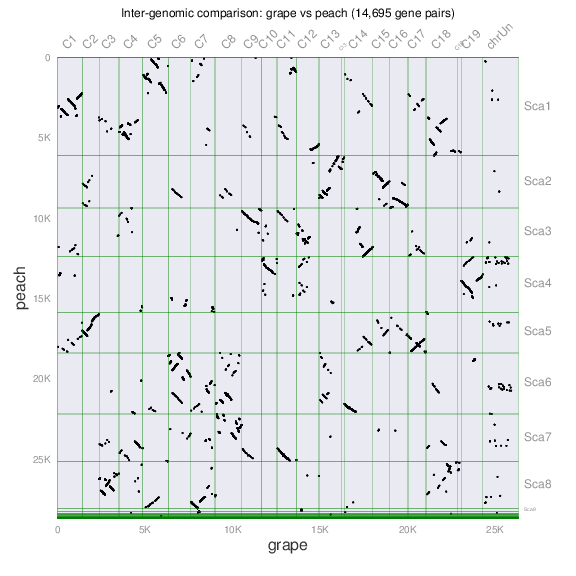

In [7]:
# display `grape.peachDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peachDEFAULT.pdf")
img

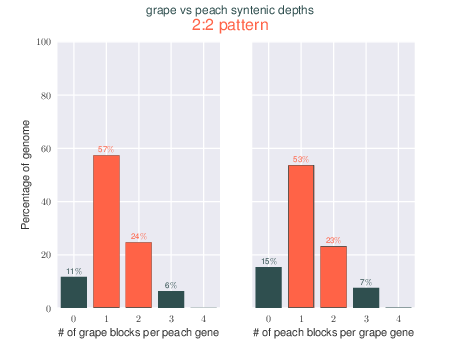

In [8]:
# display `grape.peach.depthDEFAULT.pdf`
img = WImage(filename="grape.peach.depthDEFAULT.pdf")
img

### Run with setting to collect orthologs

Delete old version of data and re-run with `--cscore=.99` option as discussed in the workflow example.

In [9]:
# remove default run
!rm grape.peach.last.filtered 
# Run to identify orthologs
!python2 -m jcvi.compara.catalog ortholog grape peach --cscore=.99
!python2 -m jcvi.graphics.dotplot grape.peach.anchors

01:54:05 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:54:05 [base] Load file `grape.bed`
01:54:05 [base] Load file `peach.bed`
01:54:06 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
01:54:06 [base] Load file `grape.peach.last`
01:54:10 [blastfilter] running the cscore filter (cscore>=0.99) ..
01:54:11 [blastfilter] after filter (294217->14417) ..
01:54:11 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
01:54:11 [blastfilter] after filter (14417->13886) ..
01:54:11 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:54:11 [base] Load file `grape.bed`
01:54:11 [base] Load file `peach.bed`
01:54:12 [base] Load file `grape.peach.last.filtered`
01:54:12 [synteny] A total of 13886 BLAST imported from `grape.peach.last.filtered`.
01:54:12 [synteny] Chaining distance = 20
01:54:12 [base] Load file `grape.peach.anchors`
A total of 11511 (NR:11497) anchors found in 369 clusters.
Stats: Min=4 Max=357 N=369 Mean=31.1951219512 SD=44.5398622113 

01:54:19 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:54:19 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:54:19 [__init__] backend agg version v2.2
01:54:20 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:54:20 [base] Load file `grape.bed`
01:54:20 [base] Load file `peach.bed`
01:54:21 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
01:54:21 [dotplot] xsize=26346 ysize=28701
01:54:21 [texmanager] serif font is not compatible with usetex.
01:54:21 [texmanager] serif font is not compatible with usetex.
01:54:21 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:54:21 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:54:21 [texmanager] cursive font is not compatible with usetex.
01:54:21 [texmanager] cursive font is not compatible with usetex.
01:54:21 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

01:54:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:54:23 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:54:23 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

01:54:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:24 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:54:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:26 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:26 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:54:26 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:26 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:54:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:28 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:54:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:54:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:54:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:54:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:54:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:48 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998e

01:54:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:54:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:50 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:54:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:54:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:54:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:54:58 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
01:54:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:54:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:54:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:54:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:54:58 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
01:54:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:54:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
01:54:58 [dviread] Dvi._xxx: encount

01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/06bdb3ea345986e066295fd3c1e7bfd1.dvi
01:54:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:54:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
01:54:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423

01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:54:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:54:59 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.tex']
01:54:59 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

01:55:00 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
01:55:00 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f865eed2770>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
01:55:00 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:55:00 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
01:55:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
01:55:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
01:55:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
01:55:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:00 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:01 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
01:55:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [texmanager] fontconfig: sans-serifcmrp

01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
01:55:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c29e610b3bc66ac7a2c8216244144ca8.dvi
01:55:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:01 [texmanager] fontconfig: sans

01:55:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
01:55:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2

01:55:04 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy', 'email.socket', 'scipy.sparse.linalg.isolve.minres', 'networkx.algorithms.tree.coding', 'matplotlib', 'networkx.readwrite.itertools', 'jcvi.utils', 'jcvi.apps.signal', 'unittest.sys', 'numpy.core.umath', 'networkx.generators.degree_seq', 'email.MIMENonMultipart', 'networkx.algorithms.voronoi', 'networkx.algorithms.tree.mst', 'networkx.algorithms.components.biconnected', 'string', 'Bio.SeqIO

01:55:04 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:55:04 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:55:04 [__init__] backend agg version v2.2
01:55:04 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:55:04 [base] Load file `grape.bed`
01:55:05 [base] Load file `peach.bed`
01:55:06 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
01:55:06 [dotplot] xsize=26346 ysize=28701
01:55:06 [texmanager] serif font is not compatible with usetex.
01:55:06 [texmanager] serif font is not compatible with usetex.
01:55:06 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:55:06 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:55:06 [texmanager] cursive font is not compatible with usetex.
01:55:06 [texmanager] cursive font is not compatible with usetex.
01:55:06 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

01:55:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:55:07 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:55:07 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

01:55:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:08 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:08 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:55:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:10 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:55:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:15 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:17 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:17 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:17 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:19 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:55:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:21 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:55:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:23 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:31 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
01:55:31 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

01:55:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

01:55:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
01:55:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

01:55:41 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
01:55:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:55:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:55:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:55:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:55:41 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
01:55:41 [dviread] Dvi._xxx: encount

01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9369fa58e3293cf82190941da3505ccc.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f0

01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:55:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007d

01:55:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:55:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
01:55:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:55:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111e

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/25a1a27c994f48454ee02ad96a273fff.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c29e610b3bc66ac7a2c8216244144ca8.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:43 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c29e610b3bc66ac7a2c8216244144ca8.dvi
01:55:43 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
01:55:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
01:55:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans


/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.dvi
01:55:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4ca40589b15d13576b66f843641d6c54.dvi
01:55:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:44 [base] Figure saved to `grape

In [10]:
# run depth script with ortholog result
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

01:55:46 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:55:46 [base] Load file `grape.bed`
01:55:46 [base] Load file `peach.bed`
01:55:47 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,891 of 26,346 (18.6%)
Depth 1: 21,225 of 26,346 (80.6%)
Depth 2: 230 of 26,346 (0.9%)
Genome peach depths:
Depth 0: 4,535 of 28,701 (15.8%)
Depth 1: 23,889 of 28,701 (83.2%)
Depth 2: 277 of 28,701 (1.0%)
01:55:47 [__init__] $HOME=/home/jovyan
01:55:47 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
01:55:47 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
01:55:47 [__init__] matplotlib version 2.2.2
01:55:47 [__init__] interactive is False
01:55:47 [__init__] platform is linux2
01:55:47 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networ

01:55:47 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:55:47 [__init__] backend agg version v2.2
grape vs peach syntenic depths
1:1 pattern
01:55:48 [texmanager] serif font is not compatible with usetex.
01:55:48 [texmanager] serif font is not compatible with usetex.
01:55:48 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:55:48 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:55:48 [texmanager] cursive font is not compatible with usetex.
01:55:48 [texmanager] cursive font is not compatible with usetex.
01:55:48 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
01:55:48 [texmanager] monospace font is not compatible with usetex.
01:55:48 [texmanager] monospace font is not compatible with usetex.
01:55:48 [texmanager] family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
01:55:48 [texmanager] following keys cha

01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6c64734d2d9944b95499df437ae22358.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203

01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/cfc378e35f19cc7b154a2ffe1658c471.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/874ac87f674a773a3e75760c741f863a.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0ec938eb72cb9c7aab02173281100a1.dvi
01:55:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfa

01:55:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/69d7749e94f78edb9d8c916ca2697dd8.dvi
01:55:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6c64734d2d9944b95499df437ae22358.dvi
01:55:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
01:55:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/32343bee547

01:55:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/c76ca11b9aa418974c45f049822ed14b.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
01:55:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
01:55:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:51 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:51 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.dvi
01:55:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:51 [texmanager] fontconfig: sans-serifcmrp

01:55:52 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:55:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/381425224300d4c9f2c591e9f6c90bb6.dvi
01:55:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:55:52 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:55:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:55:52 [dviread] Dvi: /home/jovyan/.cache/matplotli

Rename so very clear which is which.

In [11]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachORTH.pdf
!mv grape.peach.depth.pdf grape.peach.depthORTH.pdf

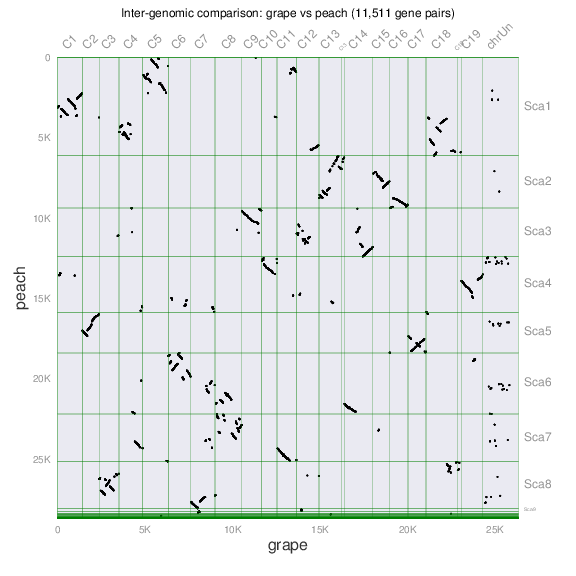

In [12]:
# display `grape.peachORTH.pdf` **ORTHOLOGS SETTING RESULT**
img = WImage(filename="grape.peachORTH.pdf")
img

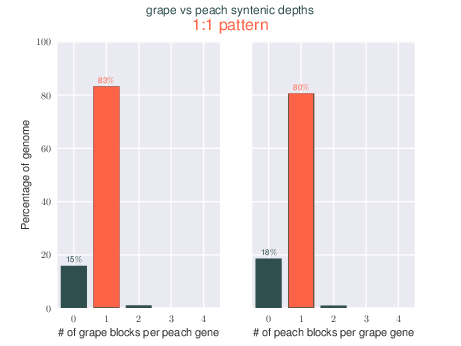

In [13]:
# display `grape.peach.depthORTH.pdf` **ORTHOLOGS SETTING RESULT**
img = WImage(filename="grape.peach.depthORTH.pdf")
img

### Macrosynteny visualization

In [14]:
# Make seqids content match example code
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8'''
!echo "{seqids_string}">seqids

In [15]:
# Make layout content match example code
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      , Grape, top, grape.bed
 .4,     .1,    .8,       0,      , Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

In [16]:
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple grape.peach.anchors grape.peach.anchors.new 

01:56:01 [base] Load file `grape.peach.anchors`
01:56:01 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
01:56:01 [base] Load file `grape.bed`
01:56:01 [base] Load file `peach.bed`
01:56:02 [base] Load file `grape.peach.anchors.new`
01:56:02 [base] Load file `grape.bed`
01:56:02 [base] Load file `peach.bed`
01:56:03 [synteny] A total of 179 blocks written to `grape.peach.anchors.simple`.
01:56:03 [synteny] Before: 369 blocks, After: 179 blocks


In [17]:
!python2 -m jcvi.graphics.karyotype seqids layout

01:56:05 [__init__] $HOME=/home/jovyan
01:56:05 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
01:56:05 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
01:56:05 [__init__] matplotlib version 2.2.2
01:56:05 [__init__] interactive is False
01:56:05 [__init__] platform is linux2
01:56:05 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

01:56:05 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:56:05 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:56:05 [__init__] backend agg version v2.2
01:56:05 [base] Load file `layout`
01:56:05 [base] Load file `grape.bed`
01:56:06 [base] Load file `peach.bed`
01:56:08 [texmanager] serif font is not compatible with usetex.
01:56:08 [texmanager] serif font is not compatible with usetex.
01:56:08 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:56:08 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:56:08 [texmanager] cursive font is not compatible with usetex.
01:56:08 [texmanager] cursive font is not compatible with usetex.
01:56:08 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
01:56:08 [texmanager] monospace font is not compatible with usetex.
01:56:08 [texmanager] monospace font is not compatible with usetex.
01:56:

01:56:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/86916282ad87a39d096e6649df8d6f46.dvi
01:56:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:08 [dviread] find_tex_file(pdftex.map): ['kpsewhich', u'pdftex.map']
01:56:08 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
01:56:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
01:56:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
01:56:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
01:56:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
01:56:09 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
01:56:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:09 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cach

01:56:09 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:56:10 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:56:10 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:56:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:56:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/b6e1395f9713468af88c38e77283fc1f.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

01:56:12 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:12 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:56:12 [texmanager] serif font is not compatible with usetex.
01:56:12 [texmanager] serif font is not compatible with usetex.
01:56:12 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:56:12 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:56:12 [texmanager] cursive font is not compatible with usetex.
01:56:12 [texmanager] cursive font is not compatible with usetex.
01:56:12 [texmanager] family: cursive, font: Zapf Chancery, info

01:56:12 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:56:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
01:56:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
01:56:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:12 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
01:56:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:13 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/4c8826b8b2992710702415750820582a.png', '/home/jovyan/.cache/matplotlib/tex.cache/986a828180d7

01:56:14 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
01:56:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
01:56:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.dvi
01:56:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/a99137e6e818e18f7703f5833ac3fa9a.png', '/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
01:56:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
01:56:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

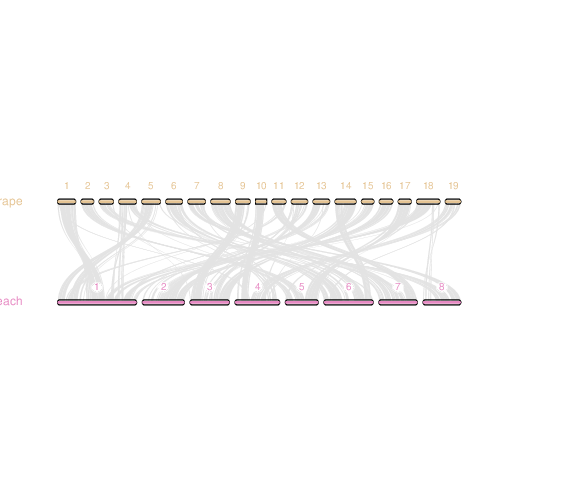

In [18]:
# display karyotype.pdf (rename it too so retained during next steps)
!mv karyotype.pdf karyotypeDEFAULT.pdf
img = WImage(filename="karyotypeDEFAULT.pdf")
img

**Add highlight.**

In [19]:
# Not mentioned but clearly layout was edited to get different colors
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      gold, Grape, top, grape.bed
 .4,     .1,    .8,       0,      greenyellow, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

In [20]:
# Add `g*` to start of first line of grape.peach.anchors.simple 
!sed -i '1 s/^/g\*/' grape.peach.anchors.simple 
#see https://stackoverflow.com/a/12318347/8508004 &
# https://superuser.com/a/246841 for sed command to prepend inplace on same line and not above first line

In [21]:
!python2 -m jcvi.graphics.karyotype seqids layout

01:56:20 [__init__] $HOME=/home/jovyan
01:56:20 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
01:56:20 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
01:56:20 [__init__] matplotlib version 2.2.2
01:56:20 [__init__] interactive is False
01:56:20 [__init__] platform is linux2
01:56:20 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

01:56:20 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
01:56:20 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
01:56:20 [__init__] backend agg version v2.2
01:56:20 [base] Load file `layout`
01:56:20 [base] Load file `grape.bed`
01:56:21 [base] Load file `peach.bed`
01:56:23 [texmanager] serif font is not compatible with usetex.
01:56:23 [texmanager] serif font is not compatible with usetex.
01:56:23 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:56:23 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:56:23 [texmanager] cursive font is not compatible with usetex.
01:56:23 [texmanager] cursive font is not compatible with usetex.
01:56:23 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
01:56:23 [texmanager] monospace font is not compatible with usetex.
01:56:23 [texmanager] monospace font is not compatible with usetex.
01:56:

01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7fc6d4351f402adfd14c7.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a

01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:24 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
01:56:24 [texmanager] serif font is not compatible with usetex.
01:56:24 [texmanager] serif font is not compatible with usetex.
01:56:24 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
01:56:24 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
01:56:24 [texmanager] cursive font is not compatible with usetex.
01:56:24 [texmanager] cursive font is not compatible with usetex.
01:56:24 [texmanager] family: cursive, font: Zapf Chancery, info

01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
01:56:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
01:56:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

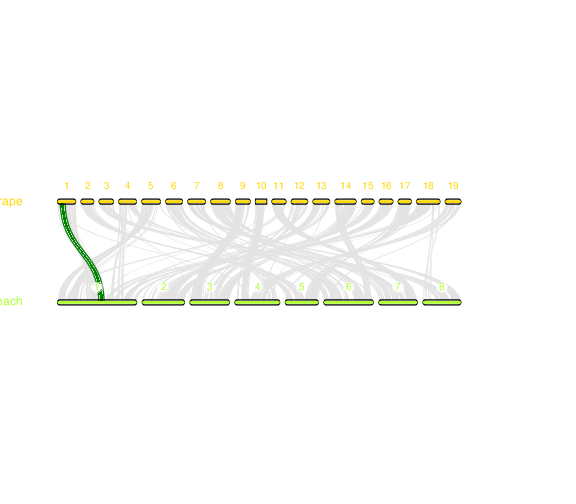

In [22]:
# display karyotype.pdf (rename it too so clear it is the second one)
!mv karyotype.pdf karyotypeHIGHLIGHT.pdf
img = WImage(filename="karyotypeHIGHLIGHT.pdf")
img

### Macrosynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

As with data above, the `Tcacao` data has been included already in this running Binder session for this section.

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [23]:
!python2 -m jcvi.formats.fasta format --sep="|" Tcacao_233_cds.fa.gz cacao.cds
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Tcacao_233_gene.gff3.gz -o cacao.bed
!python2 -m jcvi.compara.catalog ortholog peach cacao --cscore=.99
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple peach.cacao.anchors peach.cacao.anchors.new

01:56:32 [base] Load file `Tcacao_233_gene.gff3.gz`
01:57:03 [gff] Extracted 44404 features (type=mRNA id=Name)
01:57:05 [base] lastdb cacao cacao.cds
01:58:28 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao peach.cds >peach.cacao.last
02:02:43 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
02:02:43 [base] Load file `peach.bed`
02:02:43 [base] Load file `cacao.bed`
02:02:44 [blastfilter] Load BLAST file `peach.cacao.last` (total 514735 lines)
02:02:44 [base] Load file `peach.cacao.last`
02:02:50 [blastfilter] running the cscore filter (cscore>=0.99) ..
02:02:51 [blastfilter] after filter (384811->21515) ..
02:02:51 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
02:02:51 [blastfilter] after filter (21515->15817) ..
02:02:51 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
02:02:51 [base] Load file `peach.bed`
02:02:52 [base] Load file `cacao.bed`
02:02:52 [base] Load file `peach.cacao.last.filtered`
02:02:52 [synteny] A total of 15817 BLAST imported from `peac

02:03:02 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
02:03:02 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
02:03:02 [__init__] backend agg version v2.2
02:03:03 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
02:03:03 [base] Load file `peach.bed`
02:03:03 [base] Load file `cacao.bed`
02:03:05 [dotplot] Showing a random subset of 10000 data points (total 13604) for clarity.
02:03:05 [dotplot] xsize=28701 ysize=44404
02:03:05 [texmanager] serif font is not compatible with usetex.
02:03:05 [texmanager] serif font is not compatible with usetex.
02:03:05 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:03:05 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:03:05 [texmanager] cursive font is not compatible with usetex.
02:03:05 [texmanager] cursive font is not compatible with usetex.
02:03:05 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

02:03:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:06 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:06 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:03:06 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:03:06 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

02:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:08 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:03:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:10 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:20 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:03:20 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:20 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:03:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:22 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:31 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:31 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:03:31 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:38 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:03:40 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:03:41 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
02:03:42 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:03:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:03:42 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:03:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:03:42 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
02:03:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
02:03:42 [dviread] Dvi._xxx: encount

02:03:42 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/96628ec5d29ef1243f737e120d0a4cd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:03:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
02:03:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:03:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007d

02:03:43 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

02:03:43 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

02:03:45 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/96628ec5d29ef1243f737e120d0a4cd5.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3a617ea86ce32b80af54ad6d37113f3a.dvi
02:03:45 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:45 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:45 [texmanager] fontconfig: sans-serif

02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
02:03:46 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:03:46 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
02:03:46 [texmanager] fontconfig: sans-serifcmr

02:03:46 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.dvi
02:03:46 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:03:46 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/5d29e2b7ecc24bf0dbf83ca1a1d4a42c.png', '/home/jovyan/.cache/matplotlib/tex.cache/e562e291d001f4abc0029f5f96f4d01d.dvi']
02:03:46 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

02:03:46 [texmanager] fontconfi

In [24]:
#Change layout to match example
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .7,     .1,    .8,      15,      , Grape, top, grape.bed
 .5,     .1,    .8,       0,      , Peach, top, peach.bed
 .3,     .1,    .8,     -15,      , Cacao, bottom, cacao.bed
# edges
e, 0, 1, grape.peach.anchors.simple
e, 1, 2, peach.cacao.anchors.simple'''
!echo "{layout_string}">layout

In [25]:
#Change seqids to match example
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8,scaffold_9,scaffold_10r'''
!echo "{seqids_string}">seqids

In [26]:
!python2 -m jcvi.graphics.karyotype seqids layout

02:03:55 [__init__] $HOME=/home/jovyan
02:03:55 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
02:03:55 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
02:03:55 [__init__] matplotlib version 2.2.2
02:03:55 [__init__] interactive is False
02:03:55 [__init__] platform is linux2
02:03:55 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

02:03:55 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
02:03:55 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
02:03:55 [__init__] backend agg version v2.2
02:03:56 [base] Load file `layout`
02:03:56 [base] Load file `grape.bed`
02:03:57 [base] Load file `peach.bed`
02:03:58 [base] Load file `cacao.bed`
02:04:00 [texmanager] serif font is not compatible with usetex.
02:04:00 [texmanager] serif font is not compatible with usetex.
02:04:00 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:04:00 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:04:00 [texmanager] cursive font is not compatible with usetex.
02:04:00 [texmanager] cursive font is not compatible with usetex.
02:04:00 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
02:04:00 [texmanager] monospace font is not compatible with usetex.
02:04:00 [texmanager] monospace font

02:04:01 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fa3303735ffa26fea8a19a4d597d03b0.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/061eb7581678ad6ad393e68a2abd2869.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203

02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a7fc6d4351f402adfd14c7.dvi
02:04:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9661ece9f1a

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/fa3303735ffa26fea8a19a4d597d03b0.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/9acb9956a8f1073d0d7b18ed2545fab1.png', '/home/jovyan/.cache/matplotlib/tex.cache/fa3303735ffa

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
02:04:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

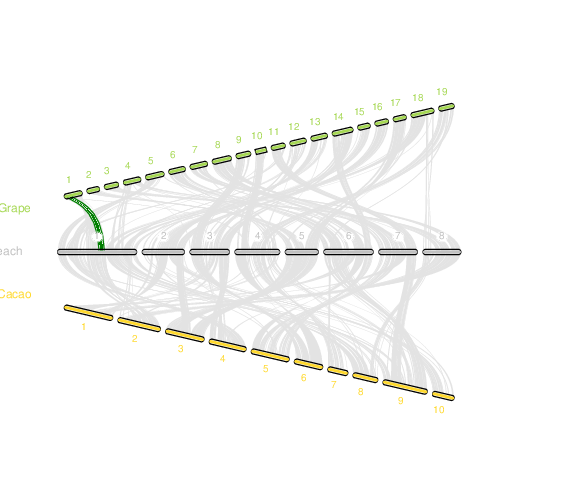

In [27]:
# display karyotype.pdf (rename it too so clear it is the three genome one)
!mv karyotype.pdf karyotypeTHREE.pdf
img = WImage(filename="karyotypeTHREE.pdf")
img

### Microsynteny visualization

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [28]:
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.peach.lifted.anchors --iter=1 -o grape.peach.i1.blocks

02:04:06 [base] Load file `grape.bed`
02:04:06 [base] Load file `grape.peach.lifted.anchors`
Chain started: 369 blocks
Chain 0: score=15493 23 blocks remained..
02:04:09 [synteny] MCscan blocks written to `grape.peach.i1.blocks`.


In [29]:
!head -50 grape.peach.i1.blocks > blocks

In [30]:
#Make blocks.layout to match example
blocks_layout_string='''# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       grape Chr1
0.5, 0.4,        0, left, center, #fc8d62,     1, peach scaffold_1
# edges
e, 0, 1'''
!echo "{blocks_layout_string}">blocks.layout

In [31]:
!cat grape.bed peach.bed > grape_peach.bed
!python2 -m jcvi.graphics.synteny blocks grape_peach.bed blocks.layout

02:04:14 [__init__] $HOME=/home/jovyan
02:04:14 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
02:04:14 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
02:04:14 [__init__] matplotlib version 2.2.2
02:04:14 [__init__] interactive is False
02:04:14 [__init__] platform is linux2
02:04:14 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

02:04:14 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
02:04:14 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
02:04:14 [__init__] backend agg version v2.2
02:04:15 [base] Load file `grape_peach.bed`
02:04:16 [base] Load file `blocks`
02:04:16 [base] Load file `blocks.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 81 (39) features .. -
02:04:16 [texmanager] serif font is not compatible with usetex.
02:04:16 [texmanager] serif font is not compatible with usetex.
02:04:16 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:04:16 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:04:16 [texmanager] cursive font is not compatible with usetex.
02:04:16 [texmanager] cursive font is not compatible with usetex.
02:04:16 [texmanager] family:

02:04:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/873472f9618bd086840649bd7ca00f72.dvi
02:04:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:17 [dviread] find_tex_file(pdftex.map): ['kpsewhich', u'pdftex.map']
02:04:17 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
02:04:17 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:04:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:04:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:04:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:04:18 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
02:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cach

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:18 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
02:04:18 [texmanager] serif font is not compatible with usetex.
02:04:18 [texmanager] serif font is not compatible with usetex.
02:04:18 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:04:18 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:04:18 [texmanager] cursive font is not compatible with usetex.
02:04:18 [texmanager] cursive font is not compatible with usetex.
02:04:18 [texmanager] family: cursive, font: Zapf Chancery, info

02:04:19 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

02:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3489e11d13be253aa129baf740c55e8a.dvi
02:04:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6bb0c8169b97d5c95feadb9edbf95899.dvi
02:04:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:04:19 [texmanager] fontconfig: sans-serif

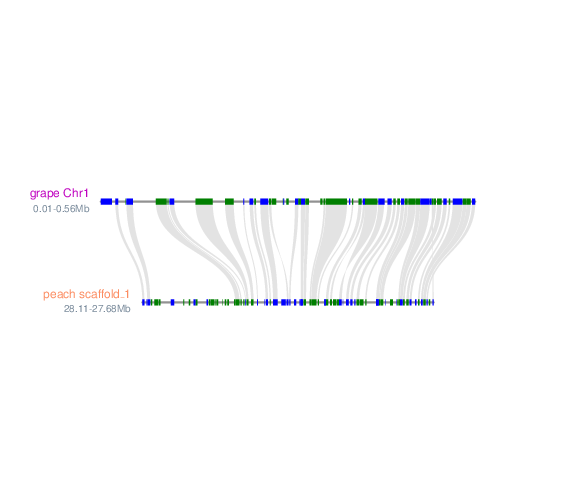

In [32]:
# display blocks.pdf (rename it too so it remains when next section run)
!mv blocks.pdf blocksVIS.pdf
img = WImage(filename="blocksVIS.pdf")
img

### Microsynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [33]:
!python2 -m jcvi.compara.catalog ortholog grape cacao --cscore=.99
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.cacao.lifted.anchors --iter=1 -o grape.cacao.i1.blocks

02:04:22 [cbook] File `cacao.prj` exists. Computation skipped.
02:04:22 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao grape.cds >grape.cacao.last
02:08:03 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
02:08:03 [base] Load file `grape.bed`
02:08:03 [base] Load file `cacao.bed`
02:08:04 [blastfilter] Load BLAST file `grape.cacao.last` (total 499456 lines)
02:08:04 [base] Load file `grape.cacao.last`
02:08:09 [blastfilter] running the cscore filter (cscore>=0.99) ..
02:08:10 [blastfilter] after filter (359783->19185) ..
02:08:10 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
02:08:10 [blastfilter] after filter (19185->14313) ..
02:08:11 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
02:08:11 [base] Load file `grape.bed`
02:08:11 [base] Load file `cacao.bed`
02:08:12 [base] Load file `grape.cacao.last.filtered`
02:08:12 [synteny] A total of 14313 BLAST imported from `grape.cacao.last.filtered`.
02:08:12 [synteny] Chaining distance = 20
02:08:12 [base] Load f

02:08:21 [__init__] backend agg version v2.2
02:08:22 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
02:08:22 [base] Load file `grape.bed`
02:08:22 [base] Load file `cacao.bed`
02:08:24 [dotplot] Showing a random subset of 10000 data points (total 11914) for clarity.
02:08:24 [dotplot] xsize=26346 ysize=44404
02:08:24 [texmanager] serif font is not compatible with usetex.
02:08:24 [texmanager] serif font is not compatible with usetex.
02:08:24 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:08:24 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:08:24 [texmanager] cursive font is not compatible with usetex.
02:08:24 [texmanager] cursive font is not compatible with usetex.
02:08:24 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
02:08:24 [texmanager] monospace font is not compatible with usetex.
02:08:24 [texmanager] monospace font is not compatible with usetex.
02:08:

02:08:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:08:25 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:08:25 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

02:08:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:27 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:27 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:29 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:08:29 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:08:29 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:08:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:08:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:39 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:08:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:08:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:08:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:39 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:08:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:44 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:48 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:50 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:08:50 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
02:08:50 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:08:50 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

02:08:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:08:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

02:08:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
02:08:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:08:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:08:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:08:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

02:09:00 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
02:09:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
02:09:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
02:09:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
02:09:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:09:00 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
02:09:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
02:09:00 [dviread] Dvi._xxx: encount

02:09:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
02:09:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
02:09:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
02:09:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

02:09:01 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/a3aedbde85b89b45c814513842300efb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

02:09:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f7ee620ae4655b3c0e3508a2ba0251b1.dvi
02:09:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.dvi
02:09:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.dvi
02:09:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:02 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
02:09:02 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist

02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
02:09:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
02:09:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:02 [texmanager] fontconfig: sans

02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
02:09:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
02:09:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:02 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:03 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:03 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/D

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.dvi
02:09:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:04 [base] Figure saved to `grape

In [34]:
!python2 -m jcvi.formats.base join grape.peach.i1.blocks grape.cacao.i1.blocks --noheader | cut -f1,2,4,6 > grape.blocks
!head -50 grape.blocks > blocks2

02:09:11 [base] Load file `grape.peach.i1.blocks`
02:09:11 [base] Imported 26346 records from `grape.peach.i1.blocks`.
02:09:11 [base] Load file `grape.cacao.i1.blocks`
02:09:11 [base] Imported 26346 records from `grape.cacao.i1.blocks`.


In [35]:
#Make blocks2.layout to match example
blocks2_layout_string='''# x,   y, rotation,     ha,     va, color, ratio,            label
0.5, 0.6,        0, center,    top,      ,     1,       grape Chr1
0.3, 0.4,        0, center, bottom,      ,    .5, peach scaffold_1
0.7, 0.4,        0, center, bottom,      ,    .5, cacao scaffold_2
# edges
e, 0, 1
e, 0, 2'''
!echo "{blocks2_layout_string}">blocks2.layout

In [36]:
!cat grape.bed peach.bed cacao.bed > grape_peach_cacao.bed
!python2 -m jcvi.graphics.synteny blocks2 grape_peach_cacao.bed blocks2.layout

02:09:16 [__init__] $HOME=/home/jovyan
02:09:16 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
02:09:16 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
02:09:16 [__init__] matplotlib version 2.2.2
02:09:16 [__init__] interactive is False
02:09:16 [__init__] platform is linux2
02:09:16 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

02:09:16 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
02:09:16 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
02:09:16 [__init__] backend agg version v2.2
02:09:17 [base] Load file `grape_peach_cacao.bed`
02:09:18 [base] Load file `blocks2`
02:09:18 [base] Load file `blocks2.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 138 (39) features .. -
Column 2: Thecc1EG011472t1 - Thecc1EG011564t1 (scaffold_2:40337967-40742182)
  scaffold_2 .. 104 (40) features .. +
02:09:19 [texmanager] serif font is not compatible with usetex.
02:09:19 [texmanager] serif font is not compatible with usetex.
02:09:19 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:09:19 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:09:19 [texmanager] cursive font i

02:09:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
02:09:20 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
02:09:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:20 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
02:09:20 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:20 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
02:09:20 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:20 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
02:09:20 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:20 [

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:21 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
02:09:21 [texmanager] serif font is not compatible with usetex.
02:09:21 [texmanager] serif font is not compatible with usetex.
02:09:21 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
02:09:21 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
02:09:21 [texmanager] cursive font is not compatible with usetex.
02:09:21 [texmanager] cursive font is not compatible with usetex.
02:09:21 [texmanager] family: cursive, font: Zapf Chancery, info

02:09:21 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

02:09:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6ed938fe1815d0223cd783dd576974b9.dvi
02:09:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
02:09:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d47316add61409cdd3c0675c2c28ef0a.dvi
02:09:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
02:09:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
02:09:21 [texmanager] fontconfig: sans-serif

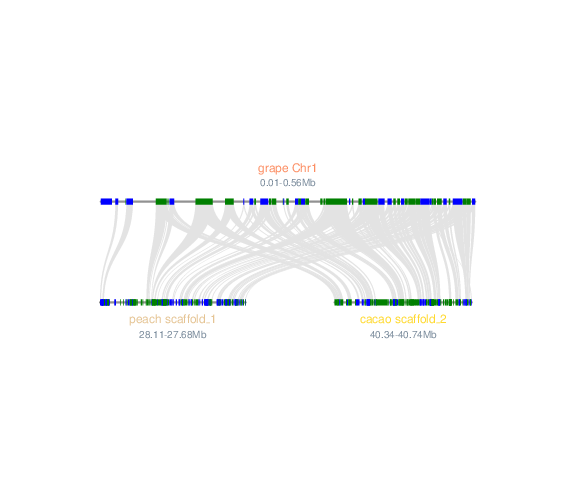

In [37]:
# display blocks2.pdf 
img = WImage(filename="blocks2.pdf")
img